In [1]:
import mne
import numpy as np

In [2]:
sbj='002'
rec='03'
edf_loc= '/media/biraj/DATA/Motor Imagery Dataset/S'+sbj+'/S'+sbj+'R'+rec+'.edf'
Data = mne.io.read_raw_edf(edf_loc)
events, event_id=mne.events_from_annotations(Data)
epochs=mne.Epochs(Data, events, event_id, tmin=0, tmax=4, baseline=(None,None))

Extracting EDF parameters from /media/biraj/DATA/Motor Imagery Dataset/S002/S002R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
30 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


In [3]:
Data.info

<Info | 7 non-empty values
 bads: []
 ch_names: Fc5., Fc3., Fc1., Fcz., Fc2., Fc4., Fc6., C5.., C3.., C1.., ...
 chs: 64 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 80.0 Hz
 meas_date: 2009-08-12 16:15:00 UTC
 nchan: 64
 projs: []
 sfreq: 160.0 Hz
>

In [4]:
events

array([[    0,     0,     1],
       [  656,     0,     2],
       [ 1312,     0,     1],
       [ 1968,     0,     3],
       [ 2624,     0,     1],
       [ 3280,     0,     3],
       [ 3936,     0,     1],
       [ 4592,     0,     2],
       [ 5248,     0,     1],
       [ 5904,     0,     2],
       [ 6560,     0,     1],
       [ 7216,     0,     3],
       [ 7872,     0,     1],
       [ 8528,     0,     3],
       [ 9184,     0,     1],
       [ 9840,     0,     2],
       [10496,     0,     1],
       [11152,     0,     3],
       [11808,     0,     1],
       [12464,     0,     2],
       [13120,     0,     1],
       [13776,     0,     2],
       [14432,     0,     1],
       [15088,     0,     3],
       [15744,     0,     1],
       [16400,     0,     2],
       [17056,     0,     1],
       [17712,     0,     3],
       [18368,     0,     1],
       [19024,     0,     2]])

In [5]:
events_T1=mne.pick_events(events, exclude=[1,3])
print(events_T1)

[[  656     0     2]
 [ 4592     0     2]
 [ 5904     0     2]
 [ 9840     0     2]
 [12464     0     2]
 [13776     0     2]
 [16400     0     2]
 [19024     0     2]]


onset = 
duration = 
desciption = 
my_ann = mne.Annotations(onset, duration, description)

In [6]:
len(events)

30

In [7]:
events[:,2]

array([1, 2, 1, 3, 1, 3, 1, 2, 1, 2, 1, 3, 1, 3, 1, 2, 1, 3, 1, 2, 1, 2,
       1, 3, 1, 2, 1, 3, 1, 2])

In [8]:
raw=Data.load_data()

Reading 0 ... 19679  =      0.000 ...   122.994 secs...


In [9]:
print(raw.annotations)


<Annotations | 30 segments: T0 (15), T1 (8), T2 (7)>


In [18]:
onset = []
duration = []
description = []

for i in range(len(events)-1):
    if events[i, 2] == 1:
        continue
    elif events[i, 2] == 2:
        print(events[i-1][0])
        onset.append(events[i-1][0])
        duration.append(events[i+1][0]-events[i-1][0])
        description.append('T1')
        continue
    elif events[i, 2] == 3:
        print(events[i-1][0])
        onset.append(events[i-1][0])
        duration.append(events[i+1][0]-events[i-1][0])
        description.append('T2')
        continue

0
1312
2624
3936
5248
6560
7872
9184
10496
11808
13120
14432
15744
17056


In [11]:
print(np.array(onset)/160)
print(np.array(duration)/160)

[  0.    8.2  16.4  24.6  32.8  41.   49.2  57.4  65.6  73.8  82.   90.2
  98.4 106.6]
[8.2 8.2 8.2 8.2 8.2 8.2 8.2 8.2 8.2 8.2 8.2 8.2 8.2 8.2]


In [13]:
onset = np.array(onset)/160
duration = np.array(duration)/160
my_ann = mne.Annotations(onset, duration, description)
print(my_ann)

<Annotations | 14 segments: T1 (7), T2 (7)>


In [15]:
Data.set_annotations(my_ann)

<RawEDF | S002R03.edf, 64 x 19680 (123.0 s), ~9.7 MB, data loaded>

In [19]:
import mne
import numpy as np
import brainconn
#import networkx as nx
#import scipy as sp
import matplotlib.pyplot as plt

Failed to import duecredit due to No module named 'duecredit'


In [28]:

info = Data.info
events, event_id=mne.events_from_annotations(Data)

epochs=mne.Epochs(Data, events, event_id=event_id,  baseline=(None,None))

#fig = mne.viz.plot_events(events,event_id=event_id,sfreq=Data.info['sfreq'], first_samp=Data.first_samp)

T1=epochs['T1'].get_data()
T2=epochs['T2'].get_data()

fmin=4
fmax=8
how_many=10


Used Annotations descriptions: ['T1', 'T2']
14 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 7 events and 113 original time points ...
1 bad epochs dropped
Loading data for 7 events and 113 original time points ...
0 bad epochs dropped


<Epochs  |   7 events (good & bad), -0.2 - 0.5 sec, baseline [None, None], ~130 kB, data not loaded,
 'T1': 7>
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 2016 connections
    using t=0.000s..0.700s for estimation (113 points)
    frequencies: 4.0Hz..8.0Hz (10 points)
    connectivity scores will be averaged for each band
    using CWT with Morlet wavelets to estimate spectra
    the following metrics will be computed: PLI
    computing connectivity for epoch 1
    computing connectivity for epoch 2
    computing connectivity for epoch 3


<ipython-input-41-b78ba9fb0a03>:7: RuntimeWarning: fmin=4.000 Hz corresponds to 2.825 < 5 cycles based on the epoch length 0.706 sec, need at least 1.250 sec epochs or fmin=7.080. Spectrum estimate will be unreliable.
  plv, freqs, times, n_epochs, n_tapers=mne.connectivity.spectral_connectivity(T,method='pli', indices=None, mode='cwt_morlet', sfreq=info['sfreq'], fmin=fmin, fmax=fmax, faverage=True, cwt_freqs=np.linspace(fmin,fmax,how_many), cwt_n_cycles=1, n_jobs=1)


    computing connectivity for epoch 4
    computing connectivity for epoch 5
    computing connectivity for epoch 6
    assembling connectivity matrix (filling the upper triangular region of the matrix)
[Connectivity computation done]
<Epochs  |   7 events (good & bad), -0.2 - 0.5 sec, baseline [None, None], ~130 kB, data not loaded,
 'T2': 7>
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 2016 connections
    using t=0.000s..0.700s for estimation (113 points)
    frequencies: 4.0Hz..8.0Hz (10 points)
    connectivity scores will be averaged for each band
    using CWT with Morlet wavelets to estimate spectra
    the following metrics will be computed: PLI
    computing connectivity for epoch 1
    computing connectivity for epoch 2
    computing connectivity for epoch 3
    computing connectivity for epoch 4


<ipython-input-41-b78ba9fb0a03>:7: RuntimeWarning: fmin=4.000 Hz corresponds to 2.825 < 5 cycles based on the epoch length 0.706 sec, need at least 1.250 sec epochs or fmin=7.080. Spectrum estimate will be unreliable.
  plv, freqs, times, n_epochs, n_tapers=mne.connectivity.spectral_connectivity(T,method='pli', indices=None, mode='cwt_morlet', sfreq=info['sfreq'], fmin=fmin, fmax=fmax, faverage=True, cwt_freqs=np.linspace(fmin,fmax,how_many), cwt_n_cycles=1, n_jobs=1)


    computing connectivity for epoch 5
    computing connectivity for epoch 6
    computing connectivity for epoch 7
    assembling connectivity matrix (filling the upper triangular region of the matrix)
[Connectivity computation done]


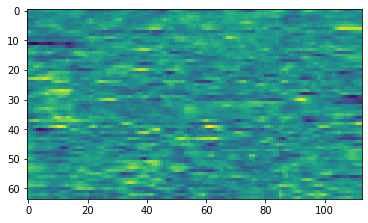

In [41]:

for i in range(3):
    if i==0:
        continue
        
    T=epochs['T'+str(i)]
    print(T)
    plv, freqs, times, n_epochs, n_tapers=mne.connectivity.spectral_connectivity(T,method='pli', indices=None, mode='cwt_morlet', sfreq=info['sfreq'], fmin=fmin, fmax=fmax, faverage=True, cwt_freqs=np.linspace(fmin,fmax,how_many), cwt_n_cycles=1, n_jobs=1)
    evc=[]
    #betweenness=[]
    for j in range(len(plv[1,1,0,:])):
        #evc.append(abs(np.linalg.eig(abs(plv[:,:,0,j]+np.transpose(plv[:,:,0,j])))[0]))
        evc.append(abs(brainconn.centrality.eigenvector_centrality_und(plv[:,:,0,j]+np.transpose(plv[:,:,0,j]))))
        #evc.append(abs(brainconn.centrality.subgraph_centrality(plv[:,:,0,j]+np.transpose(plv[:,:,0,j]))))
        #betweenness.append(brainconn.centrality.kcoreness_centrality_bu(plv[:,:,0,j]+np.transpose(plv[:,:,0,j]))[0])
    if i==1:
        evc_T1=np.transpose(np.array(evc))
        #betweenness_T1=np.transpose(np.array(betweenness))
    if i==2:
        evc_T2=np.transpose(np.array(evc))
        #betweenness_T2=np.transpose(np.array(betweenness))
    
plt.imshow(evc_T2-evc_T1)
#plt.imshow(betweenness_T1-betweenness_T0)

##